In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [29]:
# Load the dataset
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/15/Company_Data.csv')

In [30]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [32]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Data Preprocessing

In [33]:
# Convert Sales into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=3, labels=['Low', 'Medium', 'High'])


In [34]:
# Drop the original 'Sales' column, as it is now replaced by 'Sales_Category'
data.drop('Sales', axis=1, inplace=True)


In [35]:
# Handle missing values (if any)
data.dropna(inplace=True)

In [36]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [37]:
# Encode categorical variables
le = LabelEncoder()
data['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])

In [38]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Medium
397,162,26,12,368,159,2,40,18,1,1,Medium
398,100,79,7,284,95,0,50,12,1,1,Low


# Split the Data

In [39]:
X = data.drop('Sales_Category', axis=1)
y = data['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Random Forest Model

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
#Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


# Interpretation

In [42]:
print("Feature Importance Scores:")
print(feature_importance)

Feature Importance Scores:
       Feature  Importance
4        Price    0.191952
0    CompPrice    0.128402
6          Age    0.124154
5    ShelveLoc    0.120908
1       Income    0.112745
3   Population    0.106292
2  Advertising    0.105241
7    Education    0.073420
9           US    0.018445
8        Urban    0.018440


##### The feature importance scores indicate the relative importance of each attribute in predicting high sales.
##### The cloth manufacturing company can focus on optimizing pricing strategies, monitoring competitor prices, targeting specific age groups, ensuring prime shelf locations, considering the income level of target markets, allocating appropriate budgets for advertising, and understanding the local population's education level to drive higher sales.

# Analysis

### Correlation Heatmap

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_4401/3189724949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


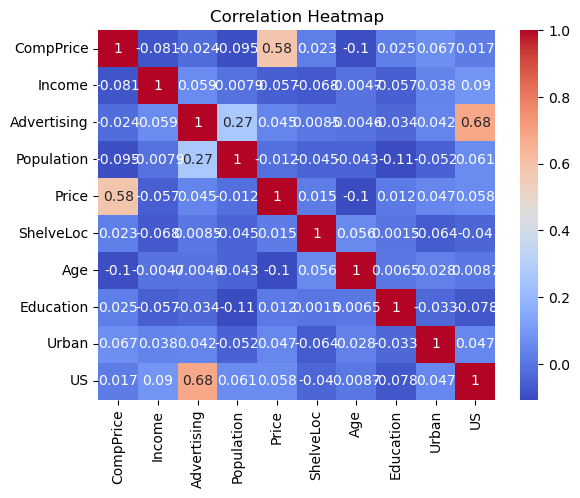

In [43]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Model Evaluation 

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the sales category using the Random Forest model
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.74      0.72      0.73        32
         Low       0.70      0.62      0.65        26
      Medium       0.38      0.45      0.42        22

    accuracy                           0.61        80
   macro avg       0.61      0.60      0.60        80
weighted avg       0.63      0.61      0.62        80

Confusion Matrix:
[[23  3  6]
 [ 0 16 10]
 [ 8  4 10]]


### Feature Importance Visualization

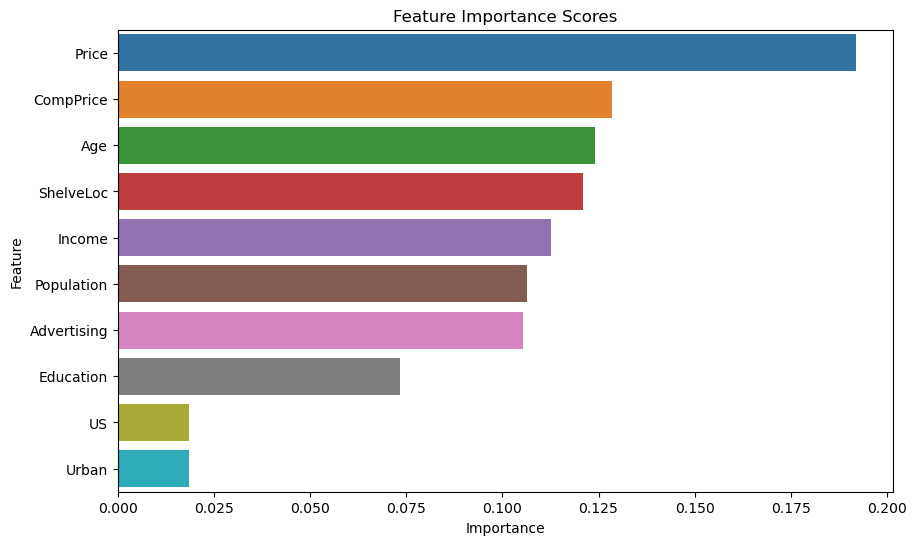

In [45]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Scores')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##### Precision : Overall, the precision is relatively moderate, with the highest precision for the 'High' category (0.74), followed by 'Low' (0.70), and the lowest for 'Medium' (0.38). This suggests that the model performs better in predicting the 'High' and 'Low' sales categories compared to the 'Medium' category.
##### Recall : The recall is highest for the 'High' category (0.72), followed by 'Medium' (0.45), and the lowest for 'Low' (0.62). This indicates that the model is relatively better at identifying the 'High' and 'Medium' sales categories compared to the 'Low' category.
##### F1-score : The F1-scores are relatively moderate, with the highest score for the 'High' category (0.73), followed by 'Low' (0.65), and the lowest for 'Medium' (0.42). This suggests that the model achieves a relatively better balance between precision and recall for the 'High' and 'Low' sales categories compared to the 'Medium' category.

##### The overall accuracy of the model is 0.61, indicating that it correctly predicted 61% of the sales categories in the test set.

##### Confusion Matrix : The model misclassified 6 instances of the 'High' category as 'Medium', 10 instances of the 'Low' category as 'Medium', and 8 instances of the 'Medium' category as 'High'.

### It appears that the Random Forest model's performance could be further improved, particularly in correctly identifying instances of the 'Medium' sales category

# Hyperparameter tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [47]:
# Define the parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}


In [48]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


In [49]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe3d4263be0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe3d42716f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe3d4217280>},
                   random_state=42, scoring='accuracy')

In [50]:
# Print the best hyperparameter values
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.75      0.76        32
         Low       0.70      0.62      0.65        26
      Medium       0.46      0.55      0.50        22

    accuracy                           0.65        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.66      0.65      0.65        80



##### The model achieved improved performance compared to the initial model
##### The hyperparameter tuning has led to improved performance, with better precision, recall, and F1-scores for the 'High' and 'Medium' categories.

# Validate the tuned model

In [51]:
from sklearn.model_selection import cross_val_score

# Create the Random Forest model with the best hyperparameters
tuned_rf_model = RandomForestClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=3, n_estimators=443, random_state=42)


In [52]:
# Perform cross-validation
cv_scores = cross_val_score(tuned_rf_model, X, y, cv=5, scoring='accuracy')


In [53]:
# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores:
[0.625  0.5875 0.7    0.6625 0.65  ]
Mean Accuracy: 0.6449999999999999


##### An average accuracy of 0.645 suggests that the tuned model performs reasonably well in predicting the sales categories on unseen data.